In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")


In [3]:
df8=pd.read_csv(r"C:\Users\athar\OneDrive\Desktop\Practical\DSPrac\Datasets\Titanic-Dataset.csv")
df8

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df8.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df8.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df8['Age'] = df8['Age'].fillna(int(df8['Age'].mean())).astype('int')
df8['Embarked'] = df8['Embarked'].fillna("Missing")
df8['Cabin'] = df8['Cabin'].fillna('Unknown')
df8.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

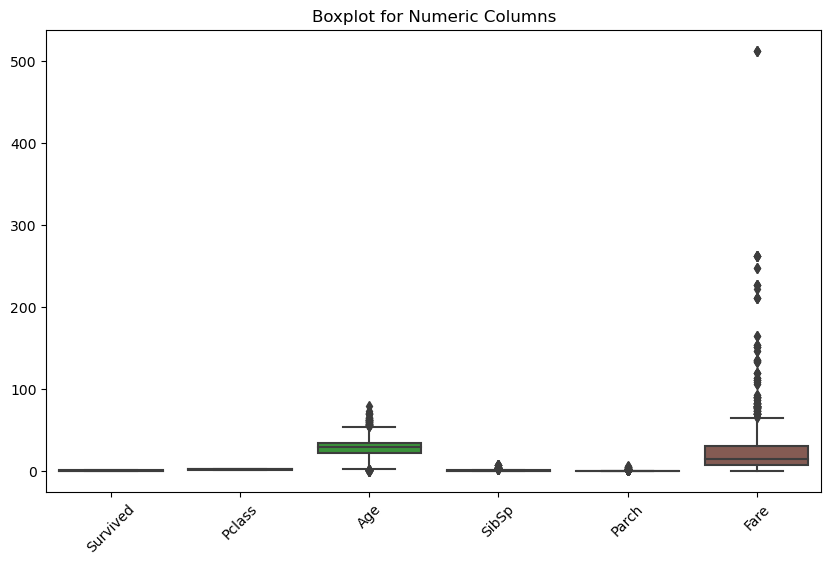

In [9]:
numeric_columns=['Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df8[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [10]:
Q1 = df8[numeric_columns].quantile(0.25)
Q3 = df8[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df8[numeric_columns] < lower_bound) | (df8[numeric_columns] > upper_bound)

df8_no_outliers = df8[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df8.shape)
print("Dataset after outlier removal:", df8_no_outliers.shape)

Dataset before outlier removal: (891, 12)
Dataset after outlier removal: (577, 12)


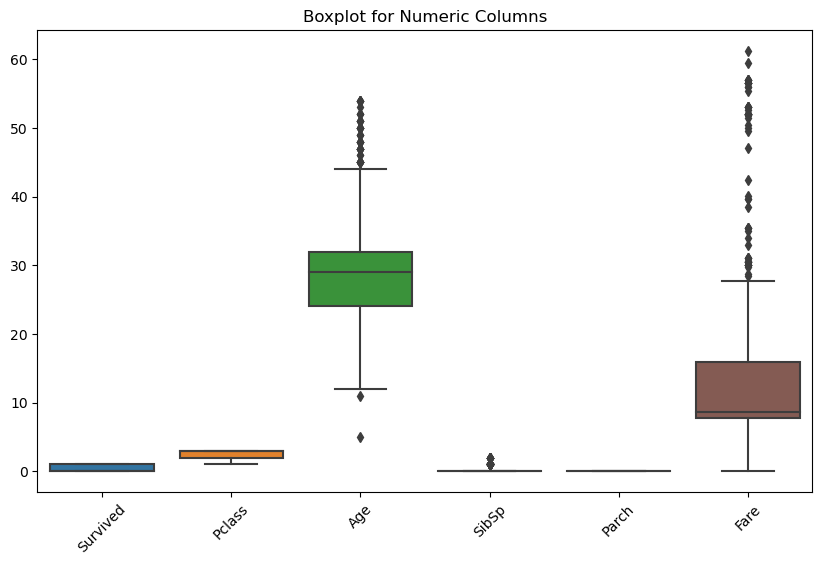

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df8_no_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns=['Survived','Pclass','Age','SibSp','Parch','Fare']
scaler = MinMaxScaler()
df8[numeric_columns] = scaler.fit_transform(df8[numeric_columns])
df8[numeric_columns].head() 

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.2750,0.125,0.0,0.014151
1,1.0,0.0,0.4750,0.125,0.0,0.139136
2,1.0,1.0,0.3250,0.000,0.0,0.015469
3,1.0,0.0,0.4375,0.125,0.0,0.103644
4,0.0,1.0,0.4375,0.000,0.0,0.015713


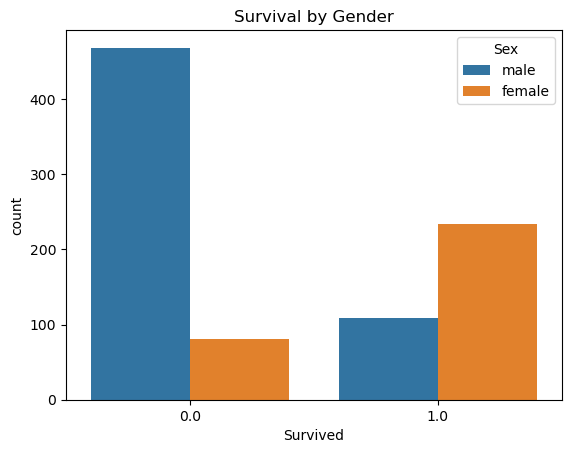

In [13]:
sns.countplot(x='Survived', hue='Sex', data=df8)
plt.title('Survival by Gender')
plt.show()

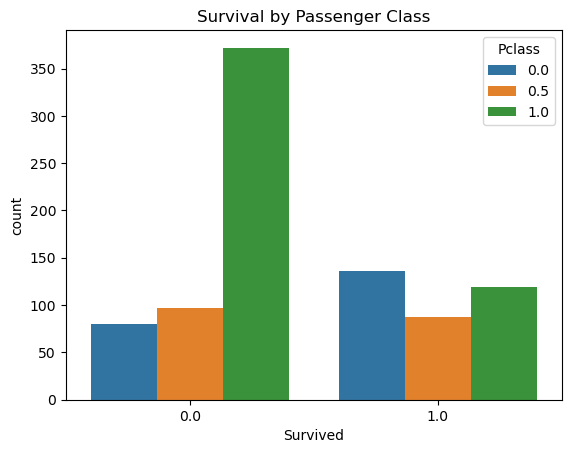

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=df8)
plt.title('Survival by Passenger Class')
plt.show()

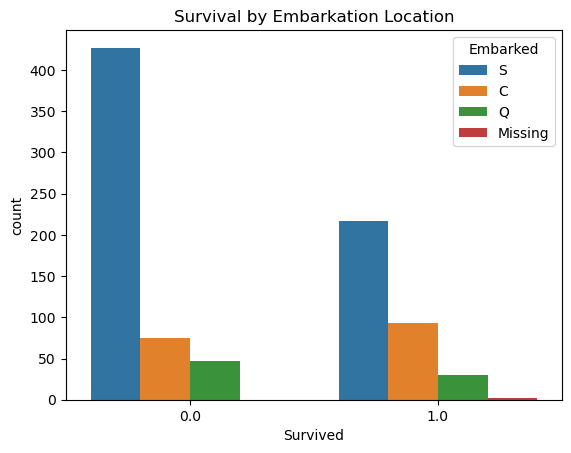

In [15]:
sns.countplot(x='Survived', hue='Embarked', data=df8)
plt.title('Survival by Embarkation Location')
plt.show()

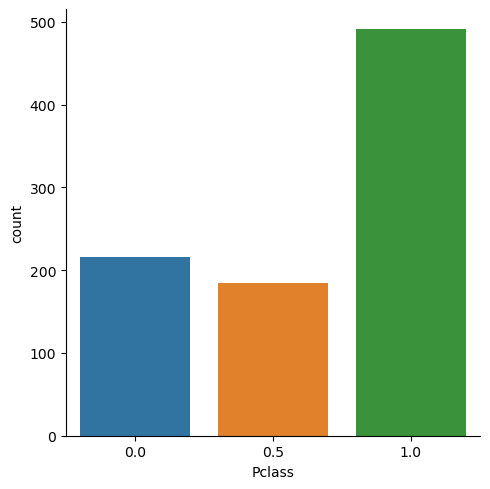

In [17]:
sns.catplot(x="Pclass",data=df8, kind='count')

<Axes: xlabel='Age', ylabel='Fare'>

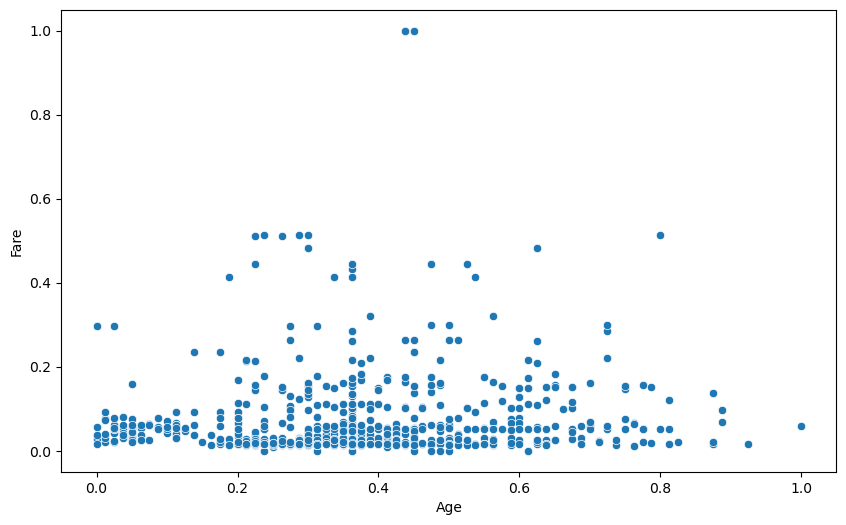

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df8)


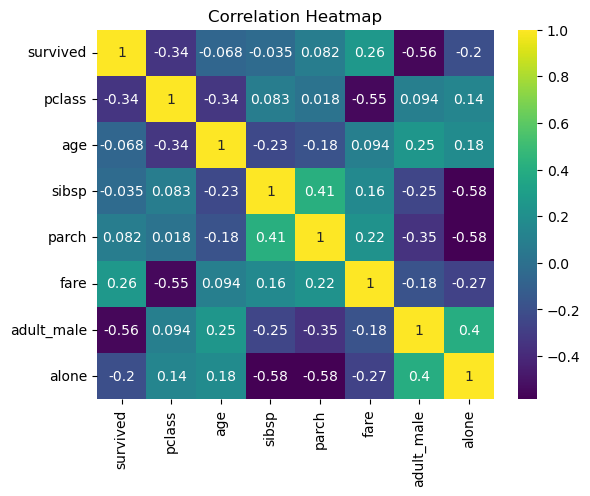

In [14]:
corr = df8.corr(numeric_only=True)

sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='fare', ylabel='Count'>

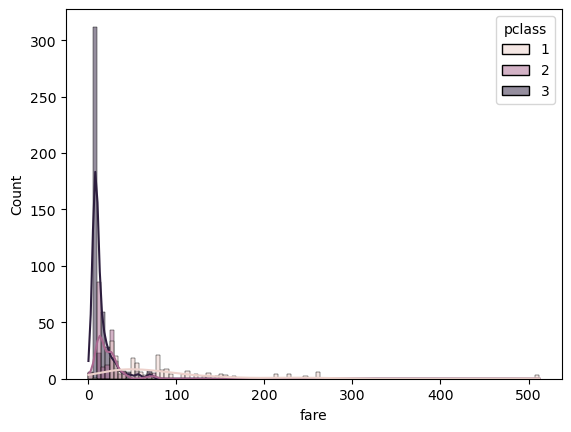

In [17]:
sns.histplot(data=df8, x="fare", hue="pclass", kde=True)

<Axes: xlabel='fare', ylabel='Count'>

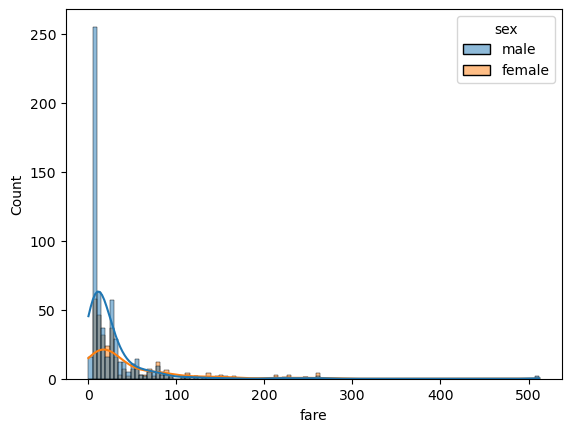

In [18]:
sns.histplot(data=df8, x="fare", hue="sex", kde=True)
